### Explore the relationship between air quality and asthma at the county level for Vermont and Kentucky

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
%matplotlib inline

### Vermont air quality and asthma

Vermont reports asthma in two-year periods. The dataset I am using is for the years 2011-2012. My AQI dataset is from 2012. Therefore, I will need to obtain 2011 data. I will read in, clean, and merge a 2011 AQI dataset with the cleaned and saved 2012 AQI dataset. Then I'll create a new Vermont AQI dataframe from the combined AQI dataset. Finally I'll merge the combined Vermont AQI dataset with the Vermont county asthma dataset. 

In [2]:
AQI3 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\annual_aqi_by_county_2011.csv') #read in 2011 csv

In [3]:
print(AQI3.info()) #provides basic information on data
print(AQI3.ndim) #provides dimensions
print(AQI3.shape) #provides number of rows and number of columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093 entries, 0 to 1092
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                1093 non-null   object
 1   County                               1093 non-null   object
 2   Year                                 1093 non-null   int64 
 3   Days with AQI                        1093 non-null   int64 
 4   Good Days                            1093 non-null   int64 
 5   Moderate Days                        1093 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  1093 non-null   int64 
 7   Unhealthy Days                       1093 non-null   int64 
 8   Very Unhealthy Days                  1093 non-null   int64 
 9   Hazardous Days                       1093 non-null   int64 
 10  Max AQI                              1093 non-null   int64 
 11  90th Percentile AQI                  1093 n

In [4]:
#Follows steps for AQI studies cleaning
#See which states are represented
AQI3States = AQI3['State'].unique()
AQI3States

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Country Of Mexico', 'Delaware',
       'District Of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [5]:
len(AQI3States)

54

In [6]:
print(np.count_nonzero(AQI3['State']== 'Canada' ))
print(np.count_nonzero(AQI3['State']== 'Country Of Mexico' ))
print(np.count_nonzero(AQI3['State']== 'Puerto Rico' ))
print(np.count_nonzero(AQI3['State']== 'District Of Columbia' ))
print(np.count_nonzero(AQI3['State']== 'Virgin Islands' ))

0
2
13
1
2


In [7]:
#Remove observations from non U.S. states
AQI3Cleaned = AQI3[(AQI3['State']!='Country Of Mexico') 
                   & (AQI3['State']!='Puerto Rico') 
                   & (AQI3['State']!='District Of Columbia') 
                   & (AQI3['State']!='Virgin Islands') ]
           
len(AQI3Cleaned)

1075

In [8]:
#save cleaned dataset 
AQI3Cleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\annual_aqi_by_county_2011_cleaned.csv', header = True)

In [9]:
AQI1Cleaned = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\annual_aqi_by_county_2012_cleaned.csv') #read in 2012 csv

In [10]:
len(AQI1Cleaned)

1053

In [11]:
#combine datasets
AQICombined = AQI1Cleaned.append(AQI3Cleaned)
len(AQICombined)

2128

In [12]:
AQICombined.head()

,Unnamed: 0,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
0,0.0,Alabama,Baldwin,2012,284,226,56,2,0,0,0,112,61,38,0,0,210,0,74,0
1,1.0,Alabama,Clay,2012,121,99,22,0,0,0,0,72,56,35,0,0,0,0,121,0
2,2.0,Alabama,Colbert,2012,283,222,55,6,0,0,0,136,62,40,0,0,209,0,74,0
3,3.0,Alabama,DeKalb,2012,361,282,74,5,0,0,0,115,64,40,0,0,320,0,41,0
4,4.0,Alabama,Elmore,2012,245,212,33,0,0,0,0,100,54,40,0,0,245,0,0,0


In [13]:
AQICombined.columns

Index(['Unnamed: 0', 'State', 'County', 'Year', 'Days with AQI', 'Good Days',
       'Moderate Days', 'Unhealthy for Sensitive Groups Days',
       'Unhealthy Days', 'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
       '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10'],
      dtype='object')

In [14]:
AQICombined = AQICombined.drop('Unnamed: 0', axis = 1).copy()

In [15]:
AQICombinedVermont = AQICombined[AQICombined['State']=='Vermont']
AQICombinedVermont

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
916,Vermont,Bennington,2012,366,327,38,1,0,0,0,108,51,35,0,0,279,0,87,0
917,Vermont,Chittenden,2012,366,323,43,0,0,0,0,100,52,36,1,13,311,0,41,0
918,Vermont,Rutland,2012,366,258,104,4,0,0,0,108,66,38,2,26,0,1,337,0
919,Vermont,Windham,2012,113,110,3,0,0,0,0,58,33,12,0,0,0,0,113,0
954,Vermont,Bennington,2011,361,292,68,1,0,0,0,140,57,38,0,0,198,0,163,0
955,Vermont,Chittenden,2011,365,294,69,2,0,0,0,105,57,38,1,3,232,0,129,0
956,Vermont,Rutland,2011,365,231,128,6,0,0,0,116,72,42,5,8,0,8,344,0
957,Vermont,Windham,2011,5,5,0,0,0,0,0,11,11,7,0,0,0,0,5,0


In [16]:
#calculate county means of all numeric columns
AQICombinedVermontFinal = AQICombinedVermont.iloc[:, 3:].groupby(AQICombinedVermont['County']).mean()
AQICombinedVermontFinal

,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
County,,,,,,,,,,,,,,,,
Bennington,363.5,309.5,53.0,1.0,0.0,0.0,0.0,124.0,54.0,36.5,0.0,0.0,238.5,0.0,125.0,0.0
Chittenden,365.5,308.5,56.0,1.0,0.0,0.0,0.0,102.5,54.5,37.0,1.0,8.0,271.5,0.0,85.0,0.0
Rutland,365.5,244.5,116.0,5.0,0.0,0.0,0.0,112.0,69.0,40.0,3.5,17.0,0.0,4.5,340.5,0.0
Windham,59.0,57.5,1.5,0.0,0.0,0.0,0.0,34.5,22.0,9.5,0.0,0.0,0.0,0.0,59.0,0.0


In [17]:
#read in Vermont county asthma geodataset created in and saved from the Asthma studies notebook 
vermontMerged_gdf = gpd.read_file('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\vermontMerged_gdf\\vermontMerged_gdf.shp')
vermontMerged_gdf.head()

,key_0,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Counties,Name_1,Percent of,countyRate,state.18,geometry
0,lamoille,50,015,01461764,0500000US50015,50015,Lamoille,06,1188280104,12659523,50015,LAMOILLE,Same,14,11,"POLYGON Z ((-72.92708 44.64501 0.00000, -72.90..."
1,essex,50,009,01461761,0500000US50009,50009,Essex,06,1718717706,30285695,50009,ESSEX,Same,10,11,"POLYGON Z ((-71.97432 44.78652 0.00000, -71.92..."
2,rutland,50,021,01461767,0500000US50021,50021,Rutland,06,2408234776,38735238,50021,RUTLAND,Same,12,11,"POLYGON Z ((-73.43123 43.58828 0.00000, -73.43..."
3,addison,50,001,01461757,0500000US50001,50001,Addison,06,1984776518,107304306,50001,ADDISON,Same,10,11,"POLYGON Z ((-73.43774 44.04501 0.00000, -73.43..."
4,bennington,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."


In [18]:
vermontMerged_gdf = vermontMerged_gdf.drop('key_0', axis = 1)

In [19]:
#merge asthma and Vermont shapefile with Vermont AQI that has observations for both 2011 and 2012 (not combined)
#in order to have more data to plot
vermontAsthmaAQI = AQICombinedVermont.merge(vermontMerged_gdf, left_on=AQICombinedVermont['County'],
                           right_on=vermontMerged_gdf['NAME'], how='left')                
vermontAsthmaAQI

,key_0,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,...,NAME,LSAD,ALAND,AWATER,Counties,Name_1,Percent of,countyRate,state.18,geometry
0,Bennington,Vermont,Bennington,2012,366,327,38,1,0,0,...,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
1,Chittenden,Vermont,Chittenden,2012,366,323,43,0,0,0,...,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."
2,Rutland,Vermont,Rutland,2012,366,258,104,4,0,0,...,Rutland,06,2408234776,38735238,50021,RUTLAND,Same,12,11,"POLYGON Z ((-73.43123 43.58828 0.00000, -73.43..."
3,Windham,Vermont,Windham,2012,113,110,3,0,0,0,...,Windham,06,2033922036,33064486,50025,WINDHAM,Same,9,11,"POLYGON Z ((-72.99694 43.11910 0.00000, -72.86..."
4,Bennington,Vermont,Bennington,2011,361,292,68,1,0,0,...,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
5,Chittenden,Vermont,Chittenden,2011,365,294,69,2,0,0,...,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."
6,Rutland,Vermont,Rutland,2011,365,231,128,6,0,0,...,Rutland,06,2408234776,38735238,50021,RUTLAND,Same,12,11,"POLYGON Z ((-73.43123 43.58828 0.00000, -73.43..."
7,Windham,Vermont,Windham,2011,5,5,0,0,0,0,...,Windham,06,2033922036,33064486,50025,WINDHAM,Same,9,11,"POLYGON Z ((-72.99694 43.11910 0.00000, -72.86..."


In [20]:
vermontAsthmaAQI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   key_0                                8 non-null      object  
 1   State                                8 non-null      object  
 2   County                               8 non-null      object  
 3   Year                                 8 non-null      int64   
 4   Days with AQI                        8 non-null      int64   
 5   Good Days                            8 non-null      int64   
 6   Moderate Days                        8 non-null      int64   
 7   Unhealthy for Sensitive Groups Days  8 non-null      int64   
 8   Unhealthy Days                       8 non-null      int64   
 9   Very Unhealthy Days                  8 non-null      int64   
 10  Hazardous Days                       8 non-null      int64   
 11  Max AQI                

In [21]:
#rename columns
vermontAsthmaAQI = vermontAsthmaAQI.rename(columns = {'Unhealthy for Sensitive Groups Days': 'U for SG Days', 
                                                      'countyRate': 'Asthma Prevalence' })

### Look at Vermont PM2.5 and ozone data for 2012

In [22]:
#read in saved pm2.5 and ozone 2012 data
pm252012 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\daily_88101_2012_cleaned.csv')
ozone2012 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\daily_44201_2012_cleaned.csv')

In [23]:
pm252012.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Parameter Code',
       'POC', 'Latitude', 'Longitude', 'Datum', 'Parameter Name',
       'Sample Duration', 'Pollutant Standard', 'Date Local',
       'Units of Measure', 'Event Type', 'Observation Count',
       'Observation Percent', 'Arithmetic Mean', '1st Max Value',
       '1st Max Hour', 'AQI', 'Method Code', 'Method Name', 'Local Site Name',
       'Address', 'State Name', 'County Name', 'City Name', 'CBSA Name',
       'Date of Last Change'],
      dtype='object')

In [24]:
#limit pm252012 to Vermont
pm252012Vermont = pm252012[pm252012['State Name']== 'Vermont']

In [25]:
pm252012Vermont['County Name'].unique()

array(['Bennington', 'Chittenden', 'Rutland'], dtype=object)

In [26]:
#group by county
pm252012VermontCounty = pm252012Vermont['Arithmetic Mean'].groupby(pm252012Vermont['County Name']).mean()

In [27]:
pm252012VermontCountydf = pd.DataFrame(pm252012VermontCounty.to_frame().reset_index())
pm252012VermontCountydf

,County Name,Arithmetic Mean
0,Bennington,6.724299
1,Chittenden,5.765385
2,Rutland,8.930435


In [28]:
#add year column
pm252012VermontCountydf['Year'] = 2012

In [29]:
#rename columns
pm252012VermontCountydf = pm252012VermontCountydf.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'PM2.5 Mean'}).copy()

In [30]:
pm252012VermontCountydf

,County,PM2.5 Mean,Year
0,Bennington,6.724299,2012
1,Chittenden,5.765385,2012
2,Rutland,8.930435,2012


In [31]:
#limit ozone2012 to Vermont
ozone2012Vermont = ozone2012[ozone2012['State Name']== 'Vermont']
len(ozone2012Vermont)

715

In [32]:
ozone2012Vermont['County Name'].unique()

array(['Bennington', 'Chittenden'], dtype=object)

In [33]:
#group by county
ozone2012VermontCounty = ozone2012Vermont['Arithmetic Mean'].groupby(ozone2012Vermont['County Name']).mean()

In [34]:
ozone2012VermontCountydf = pd.DataFrame(ozone2012VermontCounty.to_frame().reset_index())
ozone2012VermontCountydf

,County Name,Arithmetic Mean
0,Bennington,0.029957
1,Chittenden,0.034177


In [35]:
#add year column
ozone2012VermontCountydf['Year'] = 2012

In [36]:
#rename columns
ozone2012VermontCountydf = ozone2012VermontCountydf.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'Ozone Mean'}).copy()

In [37]:
ozone2012VermontCountydf

,County,Ozone Mean,Year
0,Bennington,0.029957,2012
1,Chittenden,0.034177,2012


In Vermont, there are only three counties with PM2.5 data and two counties with ozone data for 2012. 

### Read in and clean 2011 datasets for PM2.5 and ozone, limited to Vermont

In [38]:
pm252011 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2011.csv') 
ozone2011 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_2011.csv') 

In [39]:
#limit to Vermont
pm252011Vermont = pm252011[pm252011['State Name']== 'Vermont']

In [40]:
pm252011Vermont['Arithmetic Mean'].describe() #uncleaned

count    524.000000
mean       7.414695
std        5.623101
min        0.100000
25%        3.700000
50%        5.700000
75%        9.400000
max       38.100000
Name: Arithmetic Mean, dtype: float64

Follow steps for cleaning previous PM2.5 files:
(1) removal of all 1 hour samples, 
(2) removal of excluded event observations, 
(3) removal of 24-hour block averages when a site reports both 24-hour block average and 24 hour concentrations on the same date

In [41]:
#Check whether there are multiple sample durations
pm252011Vermont.groupby('Sample Duration').size()

Sample Duration
24 HOUR    524
dtype: int64

In [42]:
#Check whether there are excluded observations in event type. 
pm252011Vermont.groupby('Event Type').size()

Event Type
None    524
dtype: int64

No cleaning required.

In [43]:
#which counties are represented?
pm252011Vermont['County Name'].unique()

array(['Bennington', 'Chittenden', 'Rutland'], dtype=object)

In [44]:
#group by county
pm252011VermontCounty = pm252011Vermont['Arithmetic Mean'].groupby(pm252011Vermont['County Name']).mean()

In [45]:
pm252011VermontCountydf = pd.DataFrame(pm252011VermontCounty.to_frame().reset_index())
pm252011VermontCountydf

,County Name,Arithmetic Mean
0,Bennington,7.062264
1,Chittenden,6.487055
2,Rutland,10.387156


In [46]:
#add year column
pm252011VermontCountydf['Year']= 2011

In [47]:
#rename columns
pm252011VermontCountydf = pm252011VermontCountydf.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'PM2.5 Mean'}).copy()

In [48]:
pm252011VermontCountydf

,County,PM2.5 Mean,Year
0,Bennington,7.062264,2011
1,Chittenden,6.487055,2011
2,Rutland,10.387156,2011


In [49]:
#limit ozone to Vermont
ozone2011Vermont = ozone2011[ozone2011['State Name']== 'Vermont']
ozone2011Vermont.head()

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
354293,50,3,4,44201,1,42.88759,-73.24984,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,27,NaN,-,Morse Airport - State of Vermont Property,230 AIRPORT RD S.,Vermont,Bennington,Bennington,"Bennington, VT",2018-07-20
354294,50,3,4,44201,1,42.88759,-73.24984,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,32,NaN,-,Morse Airport - State of Vermont Property,230 AIRPORT RD S.,Vermont,Bennington,Bennington,"Bennington, VT",2018-07-20
354295,50,3,4,44201,1,42.88759,-73.24984,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,35,NaN,-,Morse Airport - State of Vermont Property,230 AIRPORT RD S.,Vermont,Bennington,Bennington,"Bennington, VT",2018-07-20
354296,50,3,4,44201,1,42.88759,-73.24984,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,29,NaN,-,Morse Airport - State of Vermont Property,230 AIRPORT RD S.,Vermont,Bennington,Bennington,"Bennington, VT",2018-07-20
354297,50,3,4,44201,1,42.88759,-73.24984,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,37,NaN,-,Morse Airport - State of Vermont Property,230 AIRPORT RD S.,Vermont,Bennington,Bennington,"Bennington, VT",2018-07-20


In [50]:
ozone2011Vermont['Arithmetic Mean'].describe() #uncleaned

count    693.000000
mean       0.031097
std        0.010299
min        0.004412
25%        0.023294
50%        0.031294
75%        0.038706
max        0.062941
Name: Arithmetic Mean, dtype: float64

In [51]:
#Check whether there are multiple sample durations
ozone2011Vermont.groupby('Sample Duration').size()

Sample Duration
8-HR RUN AVG BEGIN HOUR    693
dtype: int64

In [52]:
#Check whether there are excluded observations in event type
ozone2011Vermont.groupby('Event Type').size()

Event Type
None    693
dtype: int64

No cleaning required.

In [53]:
#which counties are represented?
ozone2011Vermont['County Name'].unique()

array(['Bennington', 'Chittenden'], dtype=object)

In [54]:
#group by county
ozone2011VermontCounty = ozone2011Vermont['Arithmetic Mean'].groupby(ozone2011Vermont['County Name']).mean()

In [55]:
ozone2011VermontCountydf = pd.DataFrame(ozone2011VermontCounty.to_frame().reset_index())
ozone2011VermontCountydf

,County Name,Arithmetic Mean
0,Bennington,0.028573
1,Chittenden,0.033378


In [56]:
#add year column
ozone2011VermontCountydf['Year']= 2011

In [57]:
#rename columns
ozone2011VermontCountydf = ozone2011VermontCountydf.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'Ozone Mean'}).copy()

In [58]:
ozone2011VermontCountydf

,County,Ozone Mean,Year
0,Bennington,0.028573,2011
1,Chittenden,0.033378,2011


### Join datasets

In [59]:
#combine PM2.5 datasets
pm25CombinedVermontCounty = pm252012VermontCountydf.append(pm252011VermontCountydf)
pm25CombinedVermontCounty

,County,PM2.5 Mean,Year
0,Bennington,6.724299,2012
1,Chittenden,5.765385,2012
2,Rutland,8.930435,2012
0,Bennington,7.062264,2011
1,Chittenden,6.487055,2011
2,Rutland,10.387156,2011


In [60]:
#group by county for mapping
pm25CombinedVermontCountyGrouped = pm25CombinedVermontCounty.iloc[:, 0:2].groupby(pm25CombinedVermontCounty['County']).mean()
pm25CombinedVermontCountyGrouped = pm25CombinedVermontCountyGrouped.reset_index().copy()
pm25CombinedVermontCountyGrouped

,County,PM2.5 Mean
0,Bennington,6.893282
1,Chittenden,6.126220
2,Rutland,9.658795


In [61]:
#combine ozone datasets
ozoneCombinedVermontCounty = ozone2012VermontCountydf.append(ozone2011VermontCountydf)
ozoneCombinedVermontCounty

,County,Ozone Mean,Year
0,Bennington,0.029957,2012
1,Chittenden,0.034177,2012
0,Bennington,0.028573,2011
1,Chittenden,0.033378,2011


In [62]:
#group by county for mapping
ozoneCombinedVermontCountyGrouped = ozoneCombinedVermontCounty.iloc[:, 0:2].groupby(ozoneCombinedVermontCounty['County']).mean()
ozoneCombinedVermontCountyGrouped = ozoneCombinedVermontCountyGrouped.reset_index().copy()
ozoneCombinedVermontCountyGrouped

,County,Ozone Mean
0,Bennington,0.029265
1,Chittenden,0.033778


### Join combined datasets with Vermont asthma dataset

In [63]:
#merge asthma and Vermont shapefile with Vermont PM2.5 that has observations for both 2011 and 2012 (not combined)
#in order to have more data to plot
vermontAsthmaPM25 = pm25CombinedVermontCounty.merge(vermontMerged_gdf, left_on=pm25CombinedVermontCounty['County'],
                           right_on=vermontMerged_gdf['NAME'], how='left')  
vermontAsthmaPM25

,key_0,County,PM2.5 Mean,Year,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Counties,Name_1,Percent of,countyRate,state.18,geometry
0,Bennington,Bennington,6.724299,2012,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
1,Chittenden,Chittenden,5.765385,2012,50,007,01461760,0500000US50007,50007,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."
2,Rutland,Rutland,8.930435,2012,50,021,01461767,0500000US50021,50021,Rutland,06,2408234776,38735238,50021,RUTLAND,Same,12,11,"POLYGON Z ((-73.43123 43.58828 0.00000, -73.43..."
3,Bennington,Bennington,7.062264,2011,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
4,Chittenden,Chittenden,6.487055,2011,50,007,01461760,0500000US50007,50007,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."
5,Rutland,Rutland,10.387156,2011,50,021,01461767,0500000US50021,50021,Rutland,06,2408234776,38735238,50021,RUTLAND,Same,12,11,"POLYGON Z ((-73.43123 43.58828 0.00000, -73.43..."


In [64]:
#rename columns
vermontAsthmaPM25 = vermontAsthmaPM25.rename(columns={'countyRate': 'Asthma Prevalence'}).copy()
vermontAsthmaPM25.head(2)

,key_0,County,PM2.5 Mean,Year,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Counties,Name_1,Percent of,Asthma Prevalence,state.18,geometry
0,Bennington,Bennington,6.724299,2012,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
1,Chittenden,Chittenden,5.765385,2012,50,007,01461760,0500000US50007,50007,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."


In [65]:
vermontAsthmaPM25.head(2)

,key_0,County,PM2.5 Mean,Year,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Counties,Name_1,Percent of,Asthma Prevalence,state.18,geometry
0,Bennington,Bennington,6.724299,2012,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
1,Chittenden,Chittenden,5.765385,2012,50,007,01461760,0500000US50007,50007,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."


In [66]:
#merge asthma and Vermont shapefile with Vermont ozone that has observations for both 2011 and 2012 (not combined)
#in order to have more data to plot
vermontAsthmaOzone = ozoneCombinedVermontCounty.merge(vermontMerged_gdf, left_on=ozoneCombinedVermontCounty['County'],
                           right_on=vermontMerged_gdf['NAME'], how='left')  
vermontAsthmaOzone


,key_0,County,Ozone Mean,Year,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Counties,Name_1,Percent of,countyRate,state.18,geometry
0,Bennington,Bennington,0.029957,2012,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
1,Chittenden,Chittenden,0.034177,2012,50,007,01461760,0500000US50007,50007,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."
2,Bennington,Bennington,0.028573,2011,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
3,Chittenden,Chittenden,0.033378,2011,50,007,01461760,0500000US50007,50007,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."


In [67]:
#rename columns
vermontAsthmaOzone = vermontAsthmaOzone.rename(columns={'countyRate': 'Asthma Prevalence'}).copy()

In [68]:
vermontAsthmaOzone.head(2)

,key_0,County,Ozone Mean,Year,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Counties,Name_1,Percent of,Asthma Prevalence,state.18,geometry
0,Bennington,Bennington,0.029957,2012,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
1,Chittenden,Chittenden,0.034177,2012,50,007,01461760,0500000US50007,50007,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."


### Create scatterplots and calculate correlation coefficients

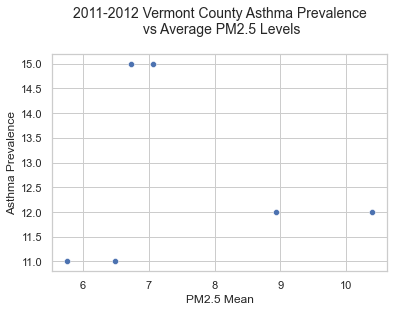

In [69]:
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize':(6,4)})
sns.scatterplot(x='PM2.5 Mean', y='Asthma Prevalence', data=vermontAsthmaPM25)
plt.title('2011-2012 Vermont County Asthma Prevalence\n vs Average PM2.5 Levels', pad=20, fontsize=14)
plt.savefig('AQAsthma2_scatterpmVermont.png', bbox_inches='tight')

In [70]:
plt.close()

In [71]:
#calculate correlation coefficient
correlationvermontAsthmaPM25 = vermontAsthmaPM25['PM2.5 Mean']. corr(vermontAsthmaPM25['Asthma Prevalence'])
correlationvermontAsthmaPM25

-0.06967202195056728

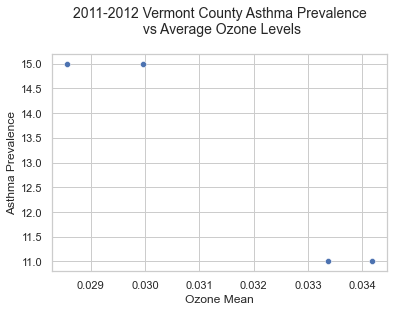

In [72]:
sns.scatterplot(x='Ozone Mean', y='Asthma Prevalence', data=vermontAsthmaOzone)
plt.title('2011-2012 Vermont County Asthma Prevalence\n vs Average Ozone Levels', pad=20, fontsize=14)
plt.savefig('AQAsthma2_scatterozVermont.png', bbox_inches='tight')

In [73]:
plt.close()

In [74]:
#calculate correlation coefficient
correlationvermontAsthmaOzone = vermontAsthmaOzone['Ozone Mean']. corr(vermontAsthmaOzone['Asthma Prevalence'])
correlationvermontAsthmaOzone

-0.9700494895274737

### Explore relationship between Vermont AQI and asthma

In [75]:
vermontAsthmaAQI

,key_0,State,County,Year,Days with AQI,Good Days,Moderate Days,U for SG Days,Unhealthy Days,Very Unhealthy Days,...,NAME,LSAD,ALAND,AWATER,Counties,Name_1,Percent of,Asthma Prevalence,state.18,geometry
0,Bennington,Vermont,Bennington,2012,366,327,38,1,0,0,...,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
1,Chittenden,Vermont,Chittenden,2012,366,323,43,0,0,0,...,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."
2,Rutland,Vermont,Rutland,2012,366,258,104,4,0,0,...,Rutland,06,2408234776,38735238,50021,RUTLAND,Same,12,11,"POLYGON Z ((-73.43123 43.58828 0.00000, -73.43..."
3,Windham,Vermont,Windham,2012,113,110,3,0,0,0,...,Windham,06,2033922036,33064486,50025,WINDHAM,Same,9,11,"POLYGON Z ((-72.99694 43.11910 0.00000, -72.86..."
4,Bennington,Vermont,Bennington,2011,361,292,68,1,0,0,...,Bennington,06,1748195212,6930003,50003,BENNINGTON,Same,15,11,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28..."
5,Chittenden,Vermont,Chittenden,2011,365,294,69,2,0,0,...,Chittenden,06,1389737928,214239771,50007,CHITTENDEN,Same,11,11,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29..."
6,Rutland,Vermont,Rutland,2011,365,231,128,6,0,0,...,Rutland,06,2408234776,38735238,50021,RUTLAND,Same,12,11,"POLYGON Z ((-73.43123 43.58828 0.00000, -73.43..."
7,Windham,Vermont,Windham,2011,5,5,0,0,0,0,...,Windham,06,2033922036,33064486,50025,WINDHAM,Same,9,11,"POLYGON Z ((-72.99694 43.11910 0.00000, -72.86..."


In [76]:
#specify initial columns of interest 
cols =  ['Good Days','U for SG Days', 'Unhealthy Days',
       'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
        '90th Percentile AQI','Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2','Days PM2.5', 'Days PM10','Asthma Prevalence']

In [77]:
vermontAsthmaAQIPlotting = vermontAsthmaAQI[cols]
vermontAsthmaAQIPlotting.describe()

,Good Days,U for SG Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Asthma Prevalence
count,8.000000,8.000000,8.0,8.0,8.0,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.00000
mean,230.000000,1.750000,0.0,0.0,0.0,93.250000,49.875000,30.750000,1.125000,6.250000,127.500000,1.125000,152.375000,0.0,11.75000
std,114.522612,2.187628,0.0,0.0,0.0,40.230585,19.467464,13.338987,1.726888,9.300538,140.173362,2.799872,126.159692,0.0,2.31455
min,5.000000,0.000000,0.0,0.0,0.0,11.000000,11.000000,7.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.0,9.00000
25%,200.750000,0.000000,0.0,0.0,0.0,89.500000,46.500000,29.250000,0.000000,0.000000,0.000000,0.000000,75.500000,0.0,10.50000
50%,275.000000,1.000000,0.0,0.0,0.0,106.500000,54.500000,37.000000,0.500000,1.500000,99.000000,0.000000,121.000000,0.0,11.50000
75%,301.250000,2.500000,0.0,0.0,0.0,110.000000,59.250000,38.000000,1.250000,9.250000,243.750000,0.250000,206.500000,0.0,12.75000
max,327.000000,6.000000,0.0,0.0,0.0,140.000000,72.000000,42.000000,5.000000,26.000000,311.000000,8.000000,344.000000,0.0,15.00000


In [78]:
 #remove the unhealthy days, very unhealthy days, hazardous days, and days PM10 from the cols list because they are all zeros.
cols = ['Good Days','U for SG Days', 'Max AQI',
        'Median AQI', '90th Percentile AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5','Asthma Prevalence']

In [79]:
vermontAsthmaAQIPlotting = vermontAsthmaAQI[cols]
vermontAsthmaAQIPlotting.describe()

,Good Days,U for SG Days,Max AQI,Median AQI,90th Percentile AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Asthma Prevalence
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000
mean,230.000000,1.750000,93.250000,30.750000,49.875000,1.125000,6.250000,127.500000,1.125000,152.375000,11.75000
std,114.522612,2.187628,40.230585,13.338987,19.467464,1.726888,9.300538,140.173362,2.799872,126.159692,2.31455
min,5.000000,0.000000,11.000000,7.000000,11.000000,0.000000,0.000000,0.000000,0.000000,5.000000,9.00000
25%,200.750000,0.000000,89.500000,29.250000,46.500000,0.000000,0.000000,0.000000,0.000000,75.500000,10.50000
50%,275.000000,1.000000,106.500000,37.000000,54.500000,0.500000,1.500000,99.000000,0.000000,121.000000,11.50000
75%,301.250000,2.500000,110.000000,38.000000,59.250000,1.250000,9.250000,243.750000,0.250000,206.500000,12.75000
max,327.000000,6.000000,140.000000,42.000000,72.000000,5.000000,26.000000,311.000000,8.000000,344.000000,15.00000


### Create a correlation matrix with heatmap

In [80]:
vermontAsthmaAQIPlotting

,Good Days,U for SG Days,Max AQI,Median AQI,90th Percentile AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Asthma Prevalence
0,327,1,108,35,51,0,0,279,0,87,15
1,323,0,100,36,52,1,13,311,0,41,11
2,258,4,108,38,66,2,26,0,1,337,12
3,110,0,58,12,33,0,0,0,0,113,9
4,292,1,140,38,57,0,0,198,0,163,15
5,294,2,105,38,57,1,3,232,0,129,11
6,231,6,116,42,72,5,8,0,8,344,12
7,5,0,11,7,11,0,0,0,0,5,9


In [81]:
vermontAsthmaAQI[cols].values
vermontAsthmaAQI[cols].values.T
cm = np.corrcoef(vermontAsthmaAQI[cols].values.T)

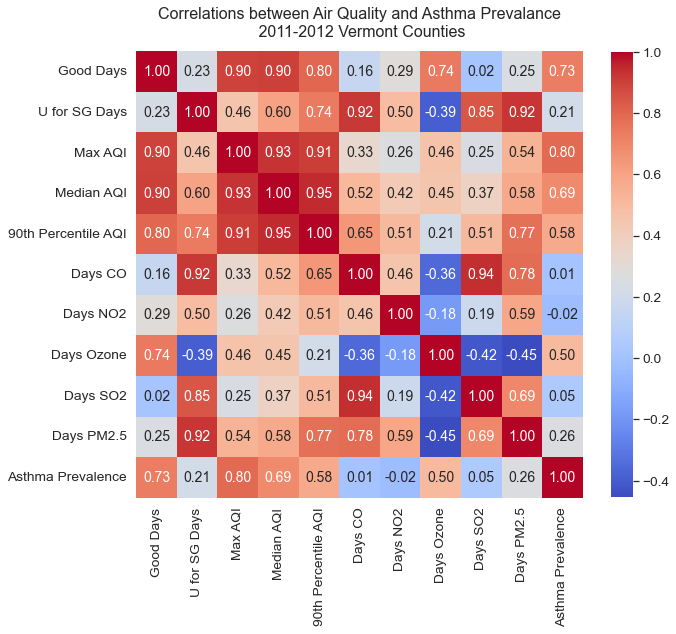

In [82]:
#correlation matrix with heatmap code modified from author Mark Dausch, CIS5400 - Python and Data Science
sns.set(font_scale=1.25)
#cbar - boolean to specify whether or not to draw the color bar
#annot - boolean to specify whether or not to annotate the heatmap
#square - boolean to specify whether or not to set the Axes aspect 
#to “equal” so each cell will be square-shaped.
#fmt='.2f' - string formatting code to use when adding annotations
#annot_kws - dict of key, value mappings, optional keyword arguments for 
#matplotlib.axes.Axes.text() when annot is True
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Correlations between Air Quality and Asthma Prevalance\n 2011-2012 Vermont Counties', pad=15, fontsize=16, )
hm = sns.heatmap(cm, cmap='coolwarm', cbar=True, cbar_kws={"shrink": 0.82}, annot=True,square=True,fmt='.2f',
                annot_kws={'size':14},yticklabels=cols,xticklabels=cols,
                ax=ax)

In [83]:
fig.savefig('AQAsthma2_heatmapVermont.png', bbox_inches='tight')

In [84]:
plt.close()

### Create scatterplots 

<AxesSubplot:xlabel='Good Days', ylabel='Asthma Prevalence'>

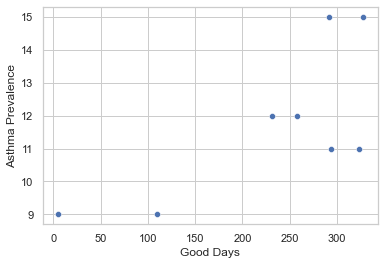

In [85]:
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize':(6,4)})
sns.scatterplot(x='Good Days', y='Asthma Prevalence', data=vermontAsthmaAQIPlotting)

In [86]:
plt.close()

<AxesSubplot:xlabel='U for SG Days', ylabel='Asthma Prevalence'>

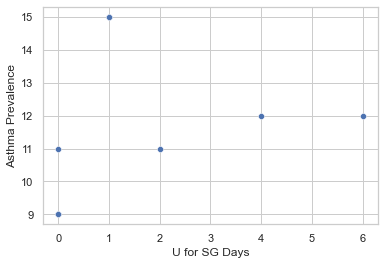

In [87]:
sns.scatterplot(x='U for SG Days', y='Asthma Prevalence', data=vermontAsthmaAQIPlotting)

In [88]:
plt.close()

<AxesSubplot:xlabel='Max AQI', ylabel='Asthma Prevalence'>

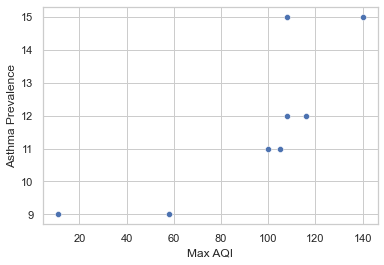

In [89]:
sns.scatterplot(x='Max AQI', y='Asthma Prevalence', data=vermontAsthmaAQIPlotting)

In [90]:
plt.close()

<AxesSubplot:xlabel='Median AQI', ylabel='Asthma Prevalence'>

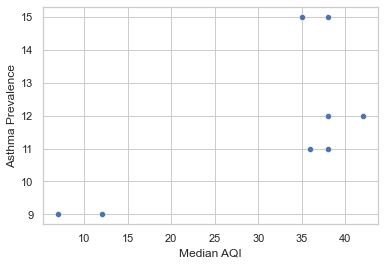

In [91]:
sns.scatterplot(x='Median AQI', y='Asthma Prevalence', data=vermontAsthmaAQIPlotting)

In [92]:
plt.close()

<AxesSubplot:xlabel='Days CO', ylabel='Asthma Prevalence'>

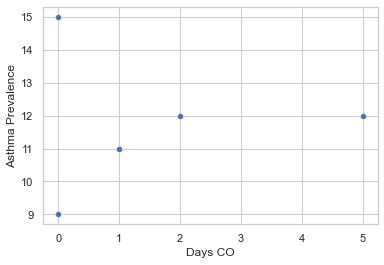

In [93]:
sns.scatterplot(x='Days CO', y='Asthma Prevalence', data=vermontAsthmaAQIPlotting)

In [94]:
plt.close()

<AxesSubplot:xlabel='Days NO2', ylabel='Asthma Prevalence'>

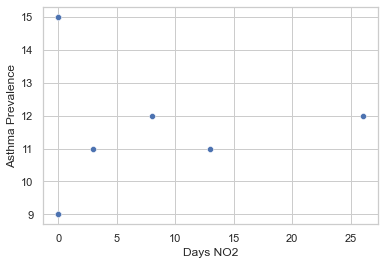

In [95]:
sns.scatterplot(x='Days NO2', y='Asthma Prevalence', data=vermontAsthmaAQIPlotting)

In [96]:
plt.close()

<AxesSubplot:xlabel='Days Ozone', ylabel='Asthma Prevalence'>

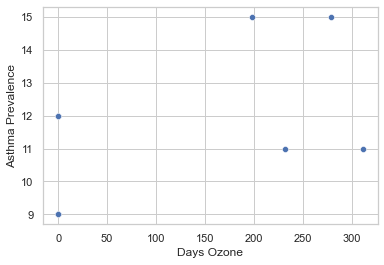

In [97]:
sns.scatterplot(x='Days Ozone', y='Asthma Prevalence', data=vermontAsthmaAQIPlotting)

In [98]:
plt.close()

<AxesSubplot:xlabel='Days SO2', ylabel='Asthma Prevalence'>

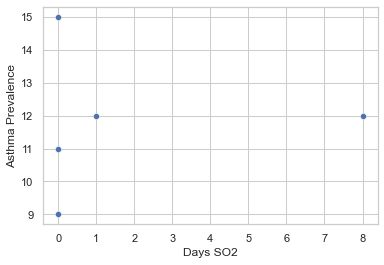

In [99]:
sns.scatterplot(x='Days SO2', y='Asthma Prevalence', data=vermontAsthmaAQIPlotting)

In [100]:
plt.close()

### Create maps

In [101]:
#read in US county shapefile map
countyMap = gpd.read_file('C:\\Users\\Mary\\CIS5898\\cb_2014_us_county_5m\\cb_2014_us_county_5m.shp')

In [102]:
#limit the county map to the state of Vermont. 
#Per https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696, the STATEFP for Vermont is 50
vermontCountyMap = countyMap[countyMap['STATEFP']== '50']

In [103]:
#merge Vermont county map with mean PM2.5
vermontPM25Map = pd.merge(vermontCountyMap, pm25CombinedVermontCountyGrouped, left_on=vermontCountyMap['NAME'], 
                right_on=pm25CombinedVermontCountyGrouped['County'], how='right')

In [104]:
vermontPM25Map

,key_0,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,County,PM2.5 Mean
0,Bennington,50,003,01461758,0500000US50003,50003,Bennington,06,1748195212,6930003,"POLYGON Z ((-73.28634 42.80804 0.00000, -73.28...",Bennington,6.893282
1,Chittenden,50,007,01461760,0500000US50007,50007,Chittenden,06,1389737928,214239771,"POLYGON Z ((-73.36149 44.56352 0.00000, -73.29...",Chittenden,6.126220
2,Rutland,50,021,01461767,0500000US50021,50021,Rutland,06,2408234776,38735238,"POLYGON Z ((-73.43123 43.58828 0.00000, -73.43...",Rutland,9.658795


<AxesSubplot:title={'center':'Vermont Mean PM2.5 Levels by County\n 2011-2012'}>

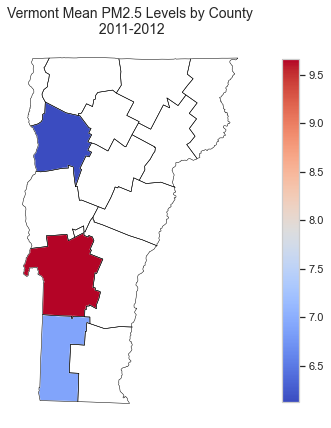

In [105]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

#plot 2012 map Vermont PM2.5 levels
fig = plt.figure(1, figsize=(12,7)) 
ax = fig.add_subplot()
ax.set_title('Vermont Mean PM2.5 Levels by County\n 2011-2012', fontsize=14)
ax.set_axis_off()

vermontCountyMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
vermontPM25Map.plot(ax = ax, column='PM2.5 Mean', legend=True,cmap='coolwarm',
                    legend_kwds={'orientation': "vertical", "shrink": 0.9})

In [106]:
fig.savefig('AQAsthma2_pmVermontmap.png')

In [107]:
plt.close()

In [108]:
#merge Vermont county map with mean Ozone
vermontOzoneMap = pd.merge(vermontCountyMap, ozoneCombinedVermontCountyGrouped, left_on=vermontCountyMap['NAME'], 
                right_on=ozoneCombinedVermontCountyGrouped['County'], how='left')

<AxesSubplot:title={'center':'Vermont Mean Ozone Levels by County\n 2011-2012'}>

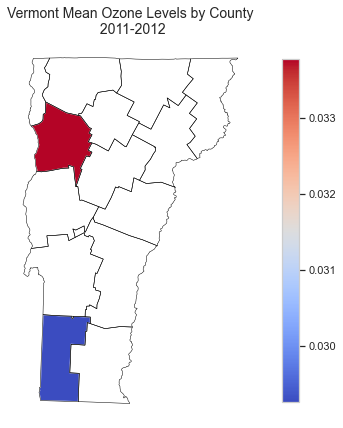

In [109]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

#plot 2011-2012 map Vermont Ozone levels
fig = plt.figure(1, figsize=(12,7)) 
ax = fig.add_subplot()
ax.set_title('Vermont Mean Ozone Levels by County\n 2011-2012', fontsize=14)
ax.set_axis_off()

vermontCountyMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
vermontOzoneMap.plot(ax = ax, column='Ozone Mean', legend=True, cmap='coolwarm',
                    legend_kwds={'orientation': "vertical", "shrink": 0.9})

In [110]:
fig.savefig('AQAsthma2_ozVermontmap.png')

In [111]:
plt.close()

<AxesSubplot:title={'center':'Vermont Asthma Prevalence and PM2.5 Levels by County\n 2011-2012'}>

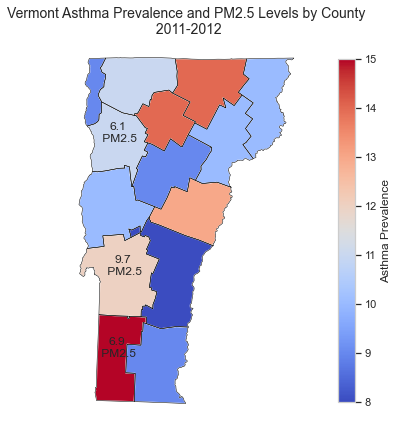

In [112]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

#plot Vermont asthma map with PM2.5 text labels
fig = plt.figure(1, figsize=(12,7)) 
ax = fig.add_subplot()
ax.set_title("Vermont Asthma Prevalence and PM2.5 Levels by County\n 2011-2012", fontsize=14)

# US Lower 48 Bounding Box
# -141.00000, 26.00000, -65.50000, 72.00000

#ax.set_xlim(-14100244, -7200000)
#ax.set_ylim(2600000, 6550000)
ax.set_axis_off()


vermontCountyMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
vermontPM25Map.apply(lambda x: ax.annotate(text= str(round(x['PM2.5 Mean'],1)) + '\n PM2.5', xy=x.geometry.centroid.coords[0], ha='center', fontsize=12),axis=1);
vermontMerged_gdf.plot(ax = ax, column='countyRate', legend=True, cmap='coolwarm',
                    legend_kwds={'label': "Asthma Prevalence",
                        'orientation': 'vertical', 'shrink': 0.9})

In [113]:
fig.savefig('AQAsthma2_asthama_pmVermontmap.png')

In [114]:
plt.close()

### Kentucky air quality and asthma

Kentucky reports asthma in two-year and three-year periods. The dataset I am using is for the years 2011-2012. I will use the AQICombined dataset for years 2011 and 2012 and extract Kentucky observations. Finally I'll merge the combined Kentucky AQI dataset with the previously created and saved Kentucky county asthma geodataset.

In [115]:
AQICombinedKentucky = AQICombined[AQICombined['State']=='Kentucky']
AQICombinedKentucky.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10
338,Kentucky,Bell,2012,259,163,92,4,0,0,0,133,74,46,0,0,229,0,30,0
339,Kentucky,Boone,2012,245,179,59,7,0,0,0,150,84,43,0,0,245,0,0,0
340,Kentucky,Boyd,2012,366,279,79,8,0,0,0,143,64,41,0,27,181,0,145,13
341,Kentucky,Bullitt,2012,245,183,56,5,1,0,0,151,77,43,0,0,245,0,0,0
342,Kentucky,Campbell,2012,364,212,124,26,1,1,0,201,93,46,0,9,193,20,142,0


In [116]:
len(AQICombinedKentucky)

59

In [117]:
#MAY USE THIS IF PLOTTING as layer ON MAP, OTHERWISE DON"T USE THIS ONE
#calculate county means of all numeric columns
AQICombinedKentuckyFinal = AQICombinedKentucky.iloc[:, 4:].groupby(AQICombinedKentucky['County']).mean()
len(AQICombinedKentuckyFinal)

30

In [118]:
#read in Kentucky county asthma geodataset created in and saved from the Asthma studies notebook 
kentuckyMerged_gdf = gpd.read_file('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\kentuckyMerged_gdf\\kentuckyMerged_gdf.shp')
kentuckyMerged_gdf.head()

,key_0,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Location,BRFSS,TimeFrame,DataType,Data,geometry
0,Cumberland,21,057,00516875,0500000US21057,21057,Cumberland,06,790416941,14830095,Cumberland,County,2011-2012,Percent,NaN,"POLYGON Z ((-85.60162 36.87220 0.00000, -85.58..."
1,Monroe,21,171,00516932,0500000US21171,21171,Monroe,06,853073327,6949354,Monroe,County,2011-2012,Percent,12.0,"POLYGON Z ((-85.97691 36.72272 0.00000, -85.80..."
2,Edmonson,21,061,00516877,0500000US21061,21061,Edmonson,06,784464286,13262147,Edmonson,County,2011-2012,Percent,18.2,"POLYGON Z ((-86.46913 37.32110 0.00000, -86.20..."
3,Pendleton,21,191,00516942,0500000US21191,21191,Pendleton,06,717838676,12325364,Pendleton,County,2011-2012,Percent,4.8,"POLYGON Z ((-84.53229 38.79194 0.00000, -84.42..."
4,Graves,21,083,00516888,0500000US21083,21083,Graves,06,1429026325,13047294,Graves,County,2011-2012,Percent,13.7,"POLYGON Z ((-88.81724 36.76775 0.00000, -88.81..."


In [119]:
kentuckyMerged_gdf = kentuckyMerged_gdf.drop('key_0', axis = 1)

In [120]:
#merge asthma and Kentucky shapefile with Kentucky AQI that has observations for both 2011 and 2012 (not combined)
#in order to have more data to plot
kentuckyAsthmaAQI = AQICombinedKentucky.merge(kentuckyMerged_gdf, left_on=AQICombinedKentucky['County'],
                           right_on=kentuckyMerged_gdf['NAME'], how='left')                
kentuckyAsthmaAQI

,key_0,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,...,NAME,LSAD,ALAND,AWATER,Location,BRFSS,TimeFrame,DataType,Data,geometry
0,Bell,Kentucky,Bell,2012,259,163,92,4,0,0,...,Bell,06,929806591,5480855,Bell,County,2011-2012,Percent,20.3,"POLYGON Z ((-83.95632 36.64544 0.00000, -83.87..."
1,Boone,Kentucky,Boone,2012,245,179,59,7,0,0,...,Boone,06,637462163,26777115,Boone,County,2011-2012,Percent,11.2,"POLYGON Z ((-84.89736 39.05738 0.00000, -84.89..."
2,Boyd,Kentucky,Boyd,2012,366,279,79,8,0,0,...,Boyd,06,414053933,5581248,Boyd,County,2011-2012,Percent,19.1,"POLYGON Z ((-82.81064 38.39302 0.00000, -82.77..."
3,Bullitt,Kentucky,Bullitt,2012,245,183,56,5,1,0,...,Bullitt,06,769295444,8386012,Bullitt,County,2011-2012,Percent,17.1,"POLYGON Z ((-85.93948 38.01095 0.00000, -85.93..."
4,Campbell,Kentucky,Campbell,2012,364,212,124,26,1,1,...,Campbell,06,391910592,20985681,Campbell,County,2011-2012,Percent,16.4,"POLYGON Z ((-84.50206 39.09664 0.00000, -84.49..."
5,Carter,Kentucky,Carter,2012,285,233,47,5,0,0,...,Carter,06,1060590174,6800556,Carter,County,2011-2012,Percent,13.6,"POLYGON Z ((-83.34135 38.31952 0.00000, -83.31..."
6,Christian,Kentucky,Christian,2012,325,224,89,12,0,0,...,Christian,06,1858332131,16928464,Christian,County,2011-2012,Percent,13.2,"POLYGON Z ((-87.71091 37.02161 0.00000, -87.68..."
7,Daviess,Kentucky,Daviess,2012,366,241,101,20,4,0,...,Daviess,06,1187163652,47158143,Daviess,County,2011-2012,Percent,8.1,"POLYGON Z ((-87.39390 37.71027 0.00000, -87.39..."
8,Edmonson,Kentucky,Edmonson,2012,365,275,76,13,1,0,...,Edmonson,06,784464286,13262147,Edmonson,County,2011-2012,Percent,18.2,"POLYGON Z ((-86.46913 37.32110 0.00000, -86.20..."
9,Fayette,Kentucky,Fayette,2012,366,223,125,17,1,0,...,Fayette,06,734648557,4922794,Fayette,County,2011-2012,Percent,16.2,"POLYGON Z ((-84.65750 38.01783 0.00000, -84.62..."


In [121]:
kentuckyAsthmaAQI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 0 to 58
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   key_0                                59 non-null     object  
 1   State                                59 non-null     object  
 2   County                               59 non-null     object  
 3   Year                                 59 non-null     int64   
 4   Days with AQI                        59 non-null     int64   
 5   Good Days                            59 non-null     int64   
 6   Moderate Days                        59 non-null     int64   
 7   Unhealthy for Sensitive Groups Days  59 non-null     int64   
 8   Unhealthy Days                       59 non-null     int64   
 9   Very Unhealthy Days                  59 non-null     int64   
 10  Hazardous Days                       59 non-null     int64   
 11  Max AQI              

In [122]:
#rename columns
kentuckyAsthmaAQI = kentuckyAsthmaAQI.rename(columns = {'Unhealthy for Sensitive Groups Days': 'U for SG Days', 
                                                      'Data': 'Asthma Prevalence' })

### Look at Kentucky PM2.5 and ozone data for 2012¶

In [123]:
#Cleaned dfs for pm2.5 and ozone 2012 were read in under the Vermont section
#limit pm252012 to Kentucky
pm252012Kentucky = pm252012[pm252012['State Name']== 'Kentucky']

In [124]:
pm252012Kentucky['County Name'].unique()

array(['Bell', 'Boyd', 'Campbell', 'Carter', 'Christian', 'Daviess',
       'Fayette', 'Hardin', 'Henderson', 'Jefferson', 'McCracken',
       'Madison', 'Pike', 'Pulaski', 'Warren'], dtype=object)

In [125]:
#group by county
pm252012KentuckyCounty = pm252012Kentucky['Arithmetic Mean'].groupby(pm252012Kentucky['County Name']).mean()

In [126]:
pm252012KentuckyCountydf = pd.DataFrame(pm252012KentuckyCounty.to_frame().reset_index())
pm252012KentuckyCountydf

,County Name,Arithmetic Mean
0,Bell,10.321429
1,Boyd,10.184298
2,Campbell,10.313305
3,Carter,8.262393
4,Christian,9.921008
5,Daviess,10.811966
6,Fayette,9.780508
7,Hardin,9.593061
8,Henderson,10.382906
9,Jefferson,12.674692


In [127]:
#add year column
pm252012KentuckyCountydf['Year'] = 2012

In [128]:
#rename columns
pm252012KentuckyCountydf = pm252012KentuckyCountydf.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'PM2.5 Mean'}).copy()

In [129]:
pm252012KentuckyCountydf

,County,PM2.5 Mean,Year
0,Bell,10.321429,2012
1,Boyd,10.184298,2012
2,Campbell,10.313305,2012
3,Carter,8.262393,2012
4,Christian,9.921008,2012
5,Daviess,10.811966,2012
6,Fayette,9.780508,2012
7,Hardin,9.593061,2012
8,Henderson,10.382906,2012
9,Jefferson,12.674692,2012


In [130]:
#limit ozone2012 to Kentucky
ozone2012Kentucky = ozone2012[ozone2012['State Name']== 'Kentucky']
len(ozone2012Kentucky)

8127

In [131]:
ozone2012Kentucky['County Name'].unique()

array(['Bell', 'Boone', 'Boyd', 'Bullitt', 'Campbell', 'Carter',
       'Christian', 'Daviess', 'Edmonson', 'Fayette', 'Greenup',
       'Hancock', 'Hardin', 'Henderson', 'Jefferson', 'Jessamine',
       'Livingston', 'McCracken', 'Morgan', 'Oldham', 'Perry', 'Pike',
       'Pulaski', 'Simpson', 'Trigg', 'Warren', 'Washington'],
      dtype=object)

In [132]:
#group by county
ozone2012KentuckyCounty = ozone2012Kentucky['Arithmetic Mean'].groupby(ozone2012Kentucky['County Name']).mean()

In [133]:
ozone2012KentuckyCountydf = pd.DataFrame(ozone2012KentuckyCounty.to_frame().reset_index())
ozone2012KentuckyCountydf

,County Name,Arithmetic Mean
0,Bell,0.037616
1,Boone,0.032224
2,Boyd,0.030545
3,Bullitt,0.030694
4,Campbell,0.039602
5,Carter,0.030930
6,Christian,0.041693
7,Daviess,0.039824
8,Edmonson,0.037782
9,Fayette,0.038178


In [134]:
#add year column
ozone2012KentuckyCountydf['Year'] = 2012

In [135]:
#rename columns
ozone2012KentuckyCountydf = ozone2012KentuckyCountydf.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'Ozone Mean'}).copy()

In [136]:
ozone2012KentuckyCountydf

,County,Ozone Mean,Year
0,Bell,0.037616,2012
1,Boone,0.032224,2012
2,Boyd,0.030545,2012
3,Bullitt,0.030694,2012
4,Campbell,0.039602,2012
5,Carter,0.030930,2012
6,Christian,0.041693,2012
7,Daviess,0.039824,2012
8,Edmonson,0.037782,2012
9,Fayette,0.038178,2012


In Kentucky, there are 15 counties with PM2.5 data and 27 counties with ozone data for 2012. Read in and clean 2011 data for PM2.5 and ozone. Will perform separate correlations between asthma and PM2.5 levels and asthma and ozone levels in Kentucky. 

### Read in and clean 2011 datasets for PM2.5 and ozone, limited to Kentucky.

In [137]:
pm252011 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_88101_2011.csv') 
ozone2011 = pd.read_csv('C:\\Users\\Mary\\CIS5898\\daily_44201_2011.csv') 

In [138]:
#limit to Kentucky
pm252011Kentucky = pm252011[pm252011['State Name']== 'Kentucky']
pm252011Kentucky

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
100364,21,13,2,88101,1,36.608430,-83.736940,WGS84,PM2.5 - Local Conditions,24 HOUR,...,77.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,MIDDLESBORO,1420 DORCHESTER AVENUE,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",2021-03-18
100365,21,13,2,88101,1,36.608430,-83.736940,WGS84,PM2.5 - Local Conditions,24 HOUR,...,80.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,MIDDLESBORO,1420 DORCHESTER AVENUE,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",2021-03-18
100366,21,13,2,88101,1,36.608430,-83.736940,WGS84,PM2.5 - Local Conditions,24 HOUR,...,18.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,MIDDLESBORO,1420 DORCHESTER AVENUE,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",2021-03-18
100367,21,13,2,88101,1,36.608430,-83.736940,WGS84,PM2.5 - Local Conditions,24 HOUR,...,59.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,MIDDLESBORO,1420 DORCHESTER AVENUE,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",2021-03-18
100368,21,13,2,88101,1,36.608430,-83.736940,WGS84,PM2.5 - Local Conditions,24 HOUR,...,26.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,MIDDLESBORO,1420 DORCHESTER AVENUE,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",2021-03-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104144,21,227,8,88101,2,37.035438,-86.250628,WGS84,PM2.5 - Local Conditions,24 HOUR,...,39.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,OAKLAND,"OAKLAND ELEMENTARY SCHOOL, 2494 CHURCH STREET",Kentucky,Warren,Oakland,"Bowling Green, KY",2014-06-07
104145,21,227,8,88101,2,37.035438,-86.250628,WGS84,PM2.5 - Local Conditions,24 HOUR,...,34.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,OAKLAND,"OAKLAND ELEMENTARY SCHOOL, 2494 CHURCH STREET",Kentucky,Warren,Oakland,"Bowling Green, KY",2014-06-07
104146,21,227,8,88101,2,37.035438,-86.250628,WGS84,PM2.5 - Local Conditions,24 HOUR,...,52.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,OAKLAND,"OAKLAND ELEMENTARY SCHOOL, 2494 CHURCH STREET",Kentucky,Warren,Oakland,"Bowling Green, KY",2014-06-07
104147,21,227,8,88101,2,37.035438,-86.250628,WGS84,PM2.5 - Local Conditions,24 HOUR,...,45.0,118.0,R & P Model 2025 PM2.5 Sequential w/WINS - GRA...,OAKLAND,"OAKLAND ELEMENTARY SCHOOL, 2494 CHURCH STREET",Kentucky,Warren,Oakland,"Bowling Green, KY",2014-06-07


In [139]:
pm252011Kentucky['Arithmetic Mean'].describe() #uncleaned

count    3785.000000
mean       11.156201
std         6.085504
min        -0.500000
25%         6.900000
50%        10.000000
75%        14.000000
max        52.958333
Name: Arithmetic Mean, dtype: float64

Follow steps for cleaning previous PM2.5 files:
(1) removal of all 1 hour samples, 
(2) removal of excluded event observations, 
(3) removal of 24-hour block averages when a site reports both 24-hour block average and 24 hour concentrations on the same date

In [140]:
#Check whether there are multiple sample durations
pm252011Kentucky.groupby('Sample Duration').size()

Sample Duration
1 HOUR            940
24 HOUR          1926
24-HR BLK AVG     919
dtype: int64

In [141]:
#remove 1 hour samples
pm252011KentuckyNon1HR = pm252011Kentucky[pm252011Kentucky['Sample Duration'] !=  '1 HOUR']
len(pm252011KentuckyNon1HR)

2845

In [142]:
#Check whether there are excluded observations in event type. 
pm252011KentuckyNon1HR.groupby('Event Type').size()

Event Type
Included     919
None        1926
dtype: int64

In [143]:
pm252011KentuckyNon1HRSorted = pm252011KentuckyNon1HR.sort_values(by=['State Code', 'County Code', 'Site Num', 'Date Local'])

In [144]:
#remove 24-hour block averages when a site reports both 24-hour block average and 24 hour concentrations on the same date
pm252011KentuckyCleaned = pm252011KentuckyNon1HRSorted.drop_duplicates(subset=['State Code', 'County Code','Site Num', 'Date Local'],
            keep='first')
len(pm252011KentuckyCleaned)

2543

In [145]:
#save cleaned dataset 
pm252011KentuckyCleaned.to_csv('C:\\Users\\Mary\\CIS5898\\FIT_capstone\\daily_88101_2011_Kentucky_cleaned.csv', header = True)

In [146]:
pm252011KentuckyCleaned['Arithmetic Mean'].describe()

count    2543.000000
mean       10.971215
std         5.837491
min        -0.500000
25%         6.900000
50%         9.900000
75%        13.900000
max        52.900000
Name: Arithmetic Mean, dtype: float64

In [147]:
#which counties are represented?
pm252011KentuckyCleaned['County Name'].unique()

array(['Bell', 'Boyd', 'Bullitt', 'Campbell', 'Carter', 'Christian',
       'Daviess', 'Fayette', 'Franklin', 'Hardin', 'Henderson',
       'Jefferson', 'McCracken', 'Madison', 'Pike', 'Pulaski', 'Warren'],
      dtype=object)

In [148]:
#group by county
pm252011KentuckyCounty = pm252011KentuckyCleaned['Arithmetic Mean'].groupby(pm252011KentuckyCleaned['County Name']).mean()

In [149]:
pm252011KentuckyCountydf = pd.DataFrame(pm252011KentuckyCounty.to_frame().reset_index())
pm252011KentuckyCountydf

,County Name,Arithmetic Mean
0,Bell,10.578571
1,Boyd,10.370000
2,Bullitt,11.663107
3,Campbell,11.608310
4,Carter,8.606723
5,Christian,11.201754
6,Daviess,12.036207
7,Fayette,10.757277
8,Franklin,10.722000
9,Hardin,8.783938


In [150]:
#add year column
pm252011KentuckyCountydf['Year']= 2011

In [151]:
#rename columns
pm252011KentuckyCountydf = pm252011KentuckyCountydf.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'PM2.5 Mean'}).copy()

In [152]:
pm252011KentuckyCountydf

,County,PM2.5 Mean,Year
0,Bell,10.578571,2011
1,Boyd,10.370000,2011
2,Bullitt,11.663107,2011
3,Campbell,11.608310,2011
4,Carter,8.606723,2011
5,Christian,11.201754,2011
6,Daviess,12.036207,2011
7,Fayette,10.757277,2011
8,Franklin,10.722000,2011
9,Hardin,8.783938,2011


In [153]:
#limit ozone to Kentucky
ozone2011Kentucky = ozone2011[ozone2011['State Name']== 'Kentucky']
ozone2011Kentucky

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,AQI,Method Code,Method Name,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
162176,21,13,2,44201,1,36.60843,-83.73694,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,29,NaN,-,MIDDLESBORO,1420 DORCHESTER AVENUE,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",2018-07-19
162177,21,13,2,44201,1,36.60843,-83.73694,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,34,NaN,-,MIDDLESBORO,1420 DORCHESTER AVENUE,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",2018-07-19
162178,21,13,2,44201,1,36.60843,-83.73694,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,43,NaN,-,MIDDLESBORO,1420 DORCHESTER AVENUE,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",2018-07-19
162179,21,13,2,44201,1,36.60843,-83.73694,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,47,NaN,-,MIDDLESBORO,1420 DORCHESTER AVENUE,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",2018-07-19
162180,21,13,2,44201,1,36.60843,-83.73694,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,43,NaN,-,MIDDLESBORO,1420 DORCHESTER AVENUE,Kentucky,Bell,Middlesborough (corporate name for Middlesboro),"Middlesborough, KY",2018-07-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170586,21,229,9991,44201,9,37.70460,-85.04850,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,29,NaN,-,Mackville,"542 Wesley-Miller Rd, Harrodsburg, KY 40330",Kentucky,Washington,Not in a city,NaN,2021-03-13
170587,21,229,9991,44201,9,37.70460,-85.04850,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,31,NaN,-,Mackville,"542 Wesley-Miller Rd, Harrodsburg, KY 40330",Kentucky,Washington,Not in a city,NaN,2021-03-13
170588,21,229,9991,44201,9,37.70460,-85.04850,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,32,NaN,-,Mackville,"542 Wesley-Miller Rd, Harrodsburg, KY 40330",Kentucky,Washington,Not in a city,NaN,2021-03-13
170589,21,229,9991,44201,9,37.70460,-85.04850,WGS84,Ozone,8-HR RUN AVG BEGIN HOUR,...,28,NaN,-,Mackville,"542 Wesley-Miller Rd, Harrodsburg, KY 40330",Kentucky,Washington,Not in a city,NaN,2021-03-13


In [154]:
ozone2011Kentucky['Arithmetic Mean'].describe() #uncleaned

count    8415.000000
mean        0.034172
std         0.010767
min         0.000000
25%         0.026647
50%         0.034235
75%         0.041706
max         0.070765
Name: Arithmetic Mean, dtype: float64

In [155]:
#Check whether there are multiple sample durations
ozone2011Kentucky.groupby('Sample Duration').size()

Sample Duration
8-HR RUN AVG BEGIN HOUR    8415
dtype: int64

In [156]:
#Check whether there are excluded observations in event type
ozone2011Kentucky.groupby('Event Type').size()

Event Type
Included     413
None        8002
dtype: int64

No cleaning required.

In [157]:
#which counties are represented?
ozone2011Kentucky['County Name'].unique()

array(['Bell', 'Boone', 'Boyd', 'Bullitt', 'Campbell', 'Carter',
       'Christian', 'Daviess', 'Edmonson', 'Fayette', 'Greenup',
       'Hancock', 'Hardin', 'Henderson', 'Jefferson', 'Jessamine',
       'Livingston', 'McCracken', 'Morgan', 'Oldham', 'Perry', 'Pike',
       'Pulaski', 'Simpson', 'Trigg', 'Warren', 'Washington'],
      dtype=object)

In [158]:
#group by county
ozone2011KentuckyCounty = ozone2011Kentucky['Arithmetic Mean'].groupby(ozone2011Kentucky['County Name']).mean()

In [159]:
ozone2011KentuckyCountydf = pd.DataFrame(ozone2011KentuckyCounty.to_frame().reset_index())
ozone2011KentuckyCountydf

,County Name,Arithmetic Mean
0,Bell,0.034877
1,Boone,0.030676
2,Boyd,0.029945
3,Bullitt,0.031325
4,Campbell,0.036538
5,Carter,0.029913
6,Christian,0.039629
7,Daviess,0.038403
8,Edmonson,0.036190
9,Fayette,0.035131


In [160]:
#add year column
ozone2011KentuckyCountydf['Year'] = 2011

In [161]:
#rename columns
ozone2011KentuckyCountydf = ozone2011KentuckyCountydf.rename(columns={'County Name': 'County', 'Arithmetic Mean': 'Ozone Mean'}).copy()

In [162]:
ozone2011KentuckyCountydf

,County,Ozone Mean,Year
0,Bell,0.034877,2011
1,Boone,0.030676,2011
2,Boyd,0.029945,2011
3,Bullitt,0.031325,2011
4,Campbell,0.036538,2011
5,Carter,0.029913,2011
6,Christian,0.039629,2011
7,Daviess,0.038403,2011
8,Edmonson,0.036190,2011
9,Fayette,0.035131,2011


### Join datasets

In [163]:
#combine PM2.5 datasets
pm25CombinedKentuckyCounty = pm252012KentuckyCountydf.append(pm252011KentuckyCountydf)
pm25CombinedKentuckyCounty

,County,PM2.5 Mean,Year
0,Bell,10.321429,2012
1,Boyd,10.184298,2012
2,Campbell,10.313305,2012
3,Carter,8.262393,2012
4,Christian,9.921008,2012
5,Daviess,10.811966,2012
6,Fayette,9.780508,2012
7,Hardin,9.593061,2012
8,Henderson,10.382906,2012
9,Jefferson,12.674692,2012


In [164]:
#group by county for mapping
pm25CombinedKentuckyCountyGrouped = pm25CombinedKentuckyCounty.iloc[:, 0:2].groupby(pm25CombinedKentuckyCounty['County']).mean()
pm25CombinedKentuckyCountyGrouped = pm25CombinedKentuckyCountyGrouped.reset_index().copy()
pm25CombinedKentuckyCountyGrouped

,County,PM2.5 Mean
0,Bell,10.450000
1,Boyd,10.277149
2,Bullitt,11.663107
3,Campbell,10.960807
4,Carter,8.434558
5,Christian,10.561381
6,Daviess,11.424086
7,Fayette,10.268893
8,Franklin,10.722000
9,Hardin,9.188500


In [165]:
#combine ozone datasets
ozoneCombinedKentuckyCounty = ozone2012KentuckyCountydf.append(ozone2011KentuckyCountydf)
ozoneCombinedKentuckyCounty

,County,Ozone Mean,Year
0,Bell,0.037616,2012
1,Boone,0.032224,2012
2,Boyd,0.030545,2012
3,Bullitt,0.030694,2012
4,Campbell,0.039602,2012
5,Carter,0.030930,2012
6,Christian,0.041693,2012
7,Daviess,0.039824,2012
8,Edmonson,0.037782,2012
9,Fayette,0.038178,2012


In [166]:
#group by county for mapping
ozoneCombinedKentuckyCountyGrouped = ozoneCombinedKentuckyCounty.iloc[:, 0:2].groupby(ozoneCombinedKentuckyCounty['County']).mean()
ozoneCombinedKentuckyCountyGrouped = ozoneCombinedKentuckyCountyGrouped.reset_index().copy()
ozoneCombinedKentuckyCountyGrouped

,County,Ozone Mean
0,Bell,0.036246
1,Boone,0.031450
2,Boyd,0.030245
3,Bullitt,0.031009
4,Campbell,0.038070
5,Carter,0.030422
6,Christian,0.040661
7,Daviess,0.039113
8,Edmonson,0.036986
9,Fayette,0.036655


### Join combined datasets with Kentucky asthma dataset

In [167]:
#merge asthma and Kentucky shapefile with Kentucky PM2.5 that has observations for both 2011 and 2012 (not combined)
#in order to have more data to plot
kentuckyAsthmaPM25 = pm25CombinedKentuckyCounty.merge(kentuckyMerged_gdf, left_on=pm25CombinedKentuckyCounty['County'],
                           right_on=kentuckyMerged_gdf['NAME'], how='left')  
kentuckyAsthmaPM25

,key_0,County,PM2.5 Mean,Year,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Location,BRFSS,TimeFrame,DataType,Data,geometry
0,Bell,Bell,10.321429,2012,21,013,00516853,0500000US21013,21013,Bell,06,929806591,5480855,Bell,County,2011-2012,Percent,20.3,"POLYGON Z ((-83.95632 36.64544 0.00000, -83.87..."
1,Boyd,Boyd,10.184298,2012,21,019,00516856,0500000US21019,21019,Boyd,06,414053933,5581248,Boyd,County,2011-2012,Percent,19.1,"POLYGON Z ((-82.81064 38.39302 0.00000, -82.77..."
2,Campbell,Campbell,10.313305,2012,21,037,00516865,0500000US21037,21037,Campbell,06,391910592,20985681,Campbell,County,2011-2012,Percent,16.4,"POLYGON Z ((-84.50206 39.09664 0.00000, -84.49..."
3,Carter,Carter,8.262393,2012,21,043,00516868,0500000US21043,21043,Carter,06,1060590174,6800556,Carter,County,2011-2012,Percent,13.6,"POLYGON Z ((-83.34135 38.31952 0.00000, -83.31..."
4,Christian,Christian,9.921008,2012,21,047,00516870,0500000US21047,21047,Christian,06,1858332131,16928464,Christian,County,2011-2012,Percent,13.2,"POLYGON Z ((-87.71091 37.02161 0.00000, -87.68..."
5,Daviess,Daviess,10.811966,2012,21,059,00516876,0500000US21059,21059,Daviess,06,1187163652,47158143,Daviess,County,2011-2012,Percent,8.1,"POLYGON Z ((-87.39390 37.71027 0.00000, -87.39..."
6,Fayette,Fayette,9.780508,2012,21,067,00516880,0500000US21067,21067,Fayette,06,734648557,4922794,Fayette,County,2011-2012,Percent,16.2,"POLYGON Z ((-84.65750 38.01783 0.00000, -84.62..."
7,Hardin,Hardin,9.593061,2012,21,093,00516893,0500000US21093,21093,Hardin,06,1614337414,17699887,Hardin,County,2011-2012,Percent,14.2,"POLYGON Z ((-86.27527 37.59352 0.00000, -86.15..."
8,Henderson,Henderson,10.382906,2012,21,101,00516897,0500000US21101,21101,Henderson,06,1130968912,76690320,Henderson,County,2011-2012,Percent,17.7,"POLYGON Z ((-87.92174 37.90789 0.00000, -87.90..."
9,Jefferson,Jefferson,12.674692,2012,21,111,00516902,0500000US21111,21111,Jefferson,06,985312154,44680808,Jefferson,County,2011-2012,Percent,16.0,"POLYGON Z ((-85.92239 38.02868 0.00000, -85.92..."


In [168]:
#rename columns
kentuckyAsthmaPM25 = kentuckyAsthmaPM25.rename(columns={'Data': 'Asthma Prevalence'}).copy()

In [169]:
#merge asthma and Kentucky shapefile with Kentucky ozone that has observations for both 2011 and 2012 (not combined)
#in order to have more data to plot
kentuckyAsthmaOzone = ozoneCombinedKentuckyCounty.merge(kentuckyMerged_gdf, left_on=ozoneCombinedKentuckyCounty['County'],
                           right_on=kentuckyMerged_gdf['NAME'], how='left')  
kentuckyAsthmaOzone


,key_0,County,Ozone Mean,Year,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,Location,BRFSS,TimeFrame,DataType,Data,geometry
0,Bell,Bell,0.037616,2012,21,013,00516853,0500000US21013,21013,Bell,06,929806591,5480855,Bell,County,2011-2012,Percent,20.3,"POLYGON Z ((-83.95632 36.64544 0.00000, -83.87..."
1,Boone,Boone,0.032224,2012,21,015,00516854,0500000US21015,21015,Boone,06,637462163,26777115,Boone,County,2011-2012,Percent,11.2,"POLYGON Z ((-84.89736 39.05738 0.00000, -84.89..."
2,Boyd,Boyd,0.030545,2012,21,019,00516856,0500000US21019,21019,Boyd,06,414053933,5581248,Boyd,County,2011-2012,Percent,19.1,"POLYGON Z ((-82.81064 38.39302 0.00000, -82.77..."
3,Bullitt,Bullitt,0.030694,2012,21,029,00516861,0500000US21029,21029,Bullitt,06,769295444,8386012,Bullitt,County,2011-2012,Percent,17.1,"POLYGON Z ((-85.93948 38.01095 0.00000, -85.93..."
4,Campbell,Campbell,0.039602,2012,21,037,00516865,0500000US21037,21037,Campbell,06,391910592,20985681,Campbell,County,2011-2012,Percent,16.4,"POLYGON Z ((-84.50206 39.09664 0.00000, -84.49..."
5,Carter,Carter,0.030930,2012,21,043,00516868,0500000US21043,21043,Carter,06,1060590174,6800556,Carter,County,2011-2012,Percent,13.6,"POLYGON Z ((-83.34135 38.31952 0.00000, -83.31..."
6,Christian,Christian,0.041693,2012,21,047,00516870,0500000US21047,21047,Christian,06,1858332131,16928464,Christian,County,2011-2012,Percent,13.2,"POLYGON Z ((-87.71091 37.02161 0.00000, -87.68..."
7,Daviess,Daviess,0.039824,2012,21,059,00516876,0500000US21059,21059,Daviess,06,1187163652,47158143,Daviess,County,2011-2012,Percent,8.1,"POLYGON Z ((-87.39390 37.71027 0.00000, -87.39..."
8,Edmonson,Edmonson,0.037782,2012,21,061,00516877,0500000US21061,21061,Edmonson,06,784464286,13262147,Edmonson,County,2011-2012,Percent,18.2,"POLYGON Z ((-86.46913 37.32110 0.00000, -86.20..."
9,Fayette,Fayette,0.038178,2012,21,067,00516880,0500000US21067,21067,Fayette,06,734648557,4922794,Fayette,County,2011-2012,Percent,16.2,"POLYGON Z ((-84.65750 38.01783 0.00000, -84.62..."


In [170]:
#rename columns
kentuckyAsthmaOzone = kentuckyAsthmaOzone.rename(columns={'Data': 'Asthma Prevalence'}).copy()

### Create scatterplots and calculate correlation coefficients

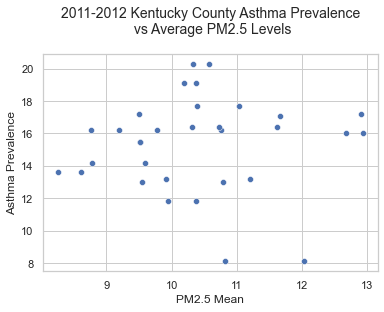

In [171]:
sns.scatterplot(x='PM2.5 Mean', y='Asthma Prevalence', data=kentuckyAsthmaPM25)
plt.title('2011-2012 Kentucky County Asthma Prevalence\n vs Average PM2.5 Levels', pad=20, fontsize=14)
plt.savefig('AQAsthma2_scatterpmKentucky.png',bbox_inches='tight')

In [172]:
plt.close()

In [173]:
#calculate correlation coefficient
correlationkentuckyAsthmaPM25 = kentuckyAsthmaPM25['PM2.5 Mean']. corr(kentuckyAsthmaPM25['Asthma Prevalence'])
correlationkentuckyAsthmaPM25

0.04530386555779416

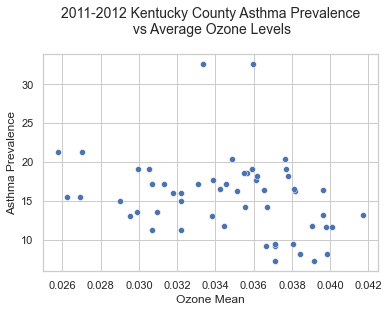

In [174]:
sns.scatterplot(x='Ozone Mean', y='Asthma Prevalence', data=kentuckyAsthmaOzone)
plt.title('2011-2012 Kentucky County Asthma Prevalence\n vs Average Ozone Levels', pad=20, fontsize=14)
plt.savefig('AQAsthma2_scatterozKentucky.png', bbox_inches='tight')

In [175]:
plt.close()

In [176]:
#calculate correlation coefficient
correlationkentuckyAsthmaOzone = kentuckyAsthmaOzone['Ozone Mean']. corr(kentuckyAsthmaOzone['Asthma Prevalence'])
correlationkentuckyAsthmaOzone

-0.2805605230776296

### Explore relationship between asthma prevalence and AQI

In [177]:
kentuckyAsthmaAQI.head()

,key_0,State,County,Year,Days with AQI,Good Days,Moderate Days,U for SG Days,Unhealthy Days,Very Unhealthy Days,...,NAME,LSAD,ALAND,AWATER,Location,BRFSS,TimeFrame,DataType,Asthma Prevalence,geometry
0,Bell,Kentucky,Bell,2012,259,163,92,4,0,0,...,Bell,06,929806591,5480855,Bell,County,2011-2012,Percent,20.3,"POLYGON Z ((-83.95632 36.64544 0.00000, -83.87..."
1,Boone,Kentucky,Boone,2012,245,179,59,7,0,0,...,Boone,06,637462163,26777115,Boone,County,2011-2012,Percent,11.2,"POLYGON Z ((-84.89736 39.05738 0.00000, -84.89..."
2,Boyd,Kentucky,Boyd,2012,366,279,79,8,0,0,...,Boyd,06,414053933,5581248,Boyd,County,2011-2012,Percent,19.1,"POLYGON Z ((-82.81064 38.39302 0.00000, -82.77..."
3,Bullitt,Kentucky,Bullitt,2012,245,183,56,5,1,0,...,Bullitt,06,769295444,8386012,Bullitt,County,2011-2012,Percent,17.1,"POLYGON Z ((-85.93948 38.01095 0.00000, -85.93..."
4,Campbell,Kentucky,Campbell,2012,364,212,124,26,1,1,...,Campbell,06,391910592,20985681,Campbell,County,2011-2012,Percent,16.4,"POLYGON Z ((-84.50206 39.09664 0.00000, -84.49..."


In [178]:
#specify initial columns of interest. 
cols =  ['Good Days','U for SG Days', 'Unhealthy Days',
       'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
        '90th Percentile AQI', 'Median AQI', 'Days CO', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10','Asthma Prevalence']

In [179]:
kentuckyAsthmaAQIPlotting = kentuckyAsthmaAQI[cols]
kentuckyAsthmaAQIPlotting.describe()

,Good Days,U for SG Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Asthma Prevalence
count,59.000000,59.000000,59.000000,59.000000,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,214.644068,8.355932,0.830508,0.067797,0.0,137.644068,71.593220,41.830508,0.016949,2.796610,199.610169,14.237288,84.322034,2.372881,15.277966
std,63.001030,8.885794,1.555331,0.253555,0.0,37.625543,15.780956,6.623242,0.130189,7.016679,88.175964,34.187283,85.417321,10.673684,5.041451
min,57.000000,0.000000,0.000000,0.000000,0.0,30.000000,22.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.200000
25%,172.000000,3.000000,0.000000,0.000000,0.0,113.500000,63.000000,41.000000,0.000000,0.000000,154.500000,0.000000,0.000000,0.000000,11.800000
50%,223.000000,5.000000,0.000000,0.000000,0.0,143.000000,71.000000,43.000000,0.000000,0.000000,209.000000,0.000000,64.000000,0.000000,16.000000
75%,261.500000,13.000000,1.000000,0.000000,0.0,157.500000,77.000000,45.000000,0.000000,0.000000,242.500000,4.500000,152.500000,0.000000,17.700000
max,321.000000,43.000000,6.000000,1.000000,0.0,204.000000,108.000000,56.000000,1.000000,27.000000,364.000000,129.000000,263.000000,59.000000,32.600000


In [180]:
#remove the very unhealthy days, hazardous days, and days CO from the cols list because they are all zeros or max of 1.
cols = ['Good Days','U for SG Days','Unhealthy Days',
       'Max AQI', '90th Percentile AQI', 'Median AQI', 'Days NO2',
       'Days Ozone', 'Days SO2', 'Days PM2.5', 'Days PM10','Asthma Prevalence']

In [181]:
kentuckyAsthmaAQIPlotting = kentuckyAsthmaAQI[cols]
kentuckyAsthmaAQIPlotting.describe()

,Good Days,U for SG Days,Unhealthy Days,Max AQI,90th Percentile AQI,Median AQI,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Asthma Prevalence
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000
mean,214.644068,8.355932,0.830508,137.644068,71.593220,41.830508,2.796610,199.610169,14.237288,84.322034,2.372881,15.277966
std,63.001030,8.885794,1.555331,37.625543,15.780956,6.623242,7.016679,88.175964,34.187283,85.417321,10.673684,5.041451
min,57.000000,0.000000,0.000000,30.000000,22.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.200000
25%,172.000000,3.000000,0.000000,113.500000,63.000000,41.000000,0.000000,154.500000,0.000000,0.000000,0.000000,11.800000
50%,223.000000,5.000000,0.000000,143.000000,71.000000,43.000000,0.000000,209.000000,0.000000,64.000000,0.000000,16.000000
75%,261.500000,13.000000,1.000000,157.500000,77.000000,45.000000,0.000000,242.500000,4.500000,152.500000,0.000000,17.700000
max,321.000000,43.000000,6.000000,204.000000,108.000000,56.000000,27.000000,364.000000,129.000000,263.000000,59.000000,32.600000


### Create a correlation matrix with heatmap¶

In [182]:
kentuckyAsthmaAQIPlotting

,Good Days,U for SG Days,Unhealthy Days,Max AQI,90th Percentile AQI,Median AQI,Days NO2,Days Ozone,Days SO2,Days PM2.5,Days PM10,Asthma Prevalence
0,163,4,0,133,74,46,0,229,0,30,0,20.3
1,179,7,0,150,84,43,0,245,0,0,0,11.2
2,279,8,0,143,64,41,27,181,0,145,13,19.1
3,183,5,1,151,77,43,0,245,0,0,0,17.1
4,212,26,1,201,93,46,9,193,20,142,0,16.4
5,233,5,0,150,58,41,0,216,0,68,1,13.6
6,224,12,0,122,77,44,0,220,41,64,0,13.2
7,241,20,4,190,87,44,17,197,8,144,0,8.1
8,275,13,1,161,77,42,0,349,0,16,0,18.2
9,223,17,1,151,77,45,12,152,0,201,1,16.2


In [183]:
kentuckyAsthmaAQI[cols].values
kentuckyAsthmaAQI[cols].values.T
cm1 = np.corrcoef(kentuckyAsthmaAQI[cols].values.T)

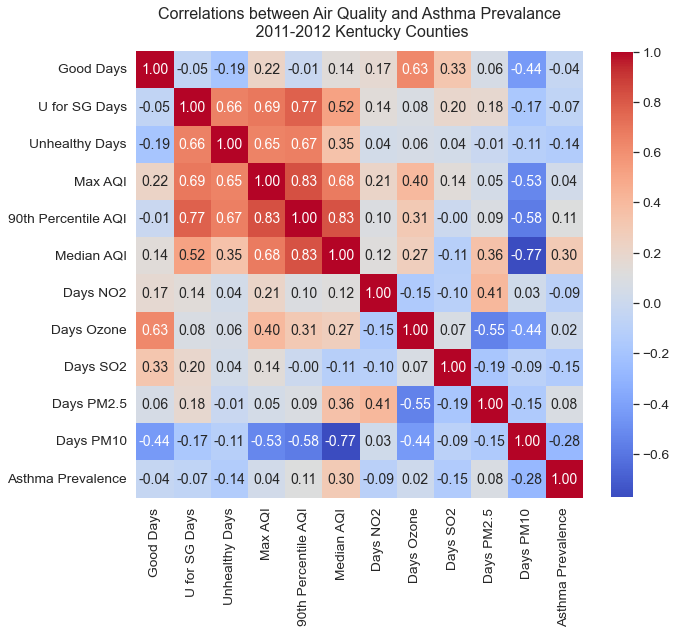

In [184]:
#correlation matrix with heatmap code modified from author Mark Dausch, CIS5400 - Python and Data Science
sns.set(font_scale=1.25)
#cbar - boolean to specify whether or not to draw the color bar
#annot - boolean to specify whether or not to annotate the heatmap
#square - boolean to specify whether or not to set the Axes aspect 
#to “equal” so each cell will be square-shaped.
#fmt='.2f' - string formatting code to use when adding annotations
#annot_kws - dict of key, value mappings, optional keyword arguments for 
#matplotlib.axes.Axes.text() when annot is True
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Correlations between Air Quality and Asthma Prevalance\n 2011-2012 Kentucky Counties', pad=15, fontsize=16, )
hm = sns.heatmap(cm1, cmap='coolwarm', cbar=True, cbar_kws={"shrink": 0.82}, annot=True,square=True,fmt='.2f',
                annot_kws={'size':14},yticklabels=cols,xticklabels=cols,
                ax=ax)

In [185]:
fig.savefig('AQAsthma2_heatmapKentucky.png', bbox_inches='tight')

In [186]:
plt.close()

From the heatmap, the highest correlation (positive or negative) between asthma and the features columns is 0.30 for median AQI. Plot a scatterplot for this only.

### Create scatterplot

<AxesSubplot:xlabel='Median AQI', ylabel='Asthma Prevalence'>

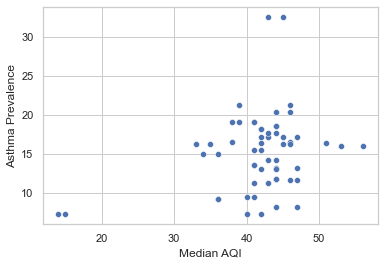

In [187]:
sns.set(style='whitegrid', context='notebook', rc={'figure.figsize':(6,4)})
sns.scatterplot(x='Median AQI', y='Asthma Prevalence', data=kentuckyAsthmaAQIPlotting)

In [188]:
plt.close()

#### Create maps

In [189]:
#limit the county map to the state of Kentucky. 
#Per https://www.nrcs.usda.gov/wps/portal/nrcs/detail/?cid=nrcs143_013696, the STATEFP for Kentucky is 50
kentuckyCountyMap = countyMap[countyMap['STATEFP']== '21']

In [190]:
#merge Vermont county map with mean PM2.5
kentuckyPM25Map = pd.merge(kentuckyCountyMap, pm25CombinedKentuckyCountyGrouped, left_on=kentuckyCountyMap['NAME'], 
                right_on=pm25CombinedKentuckyCountyGrouped['County'], how='right')

<AxesSubplot:title={'center':'Kentucky Mean PM2.5 Levels by County\n 2011-2012'}>

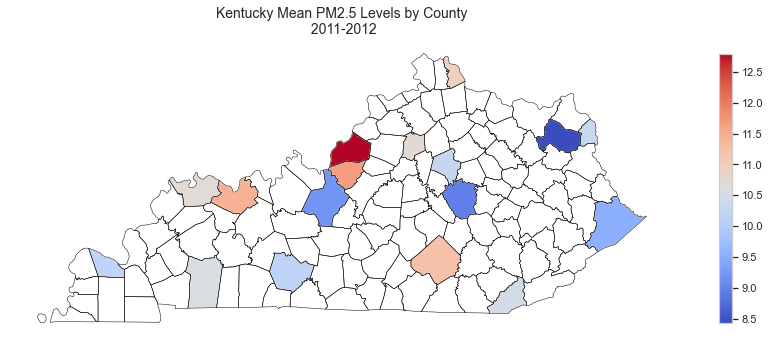

In [191]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

#plot 2012 map Kentucky PM2.5 levels
fig = plt.figure(1, figsize=(15,9)) 
ax = fig.add_subplot()
ax.set_title('Kentucky Mean PM2.5 Levels by County\n 2011-2012', fontsize=14)
ax.set_axis_off()

kentuckyCountyMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
kentuckyPM25Map.plot(ax = ax, column='PM2.5 Mean', legend=True,cmap='coolwarm',
                    legend_kwds={'orientation': "vertical", "shrink": 0.55})

In [192]:
fig.savefig('AQAsthma2_pmKentuckymap.png')

In [193]:
plt.close()

In [194]:
#merge Kentucky county map with mean Ozone
kentuckyOzoneMap = pd.merge(kentuckyCountyMap, ozoneCombinedKentuckyCountyGrouped, left_on=kentuckyCountyMap['NAME'], 
                right_on=ozoneCombinedKentuckyCountyGrouped['County'], how='left')

<AxesSubplot:title={'center':'Kentucky Mean Ozone Levels by County\n 2011-2012'}>

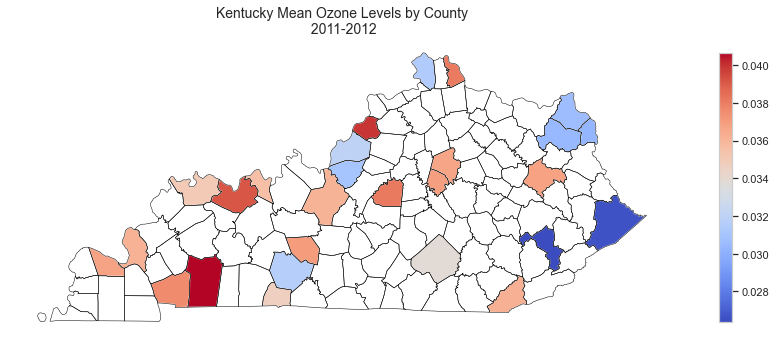

In [195]:
#Code for visualizing maps was modified from author Jonathan Cutrer's GeoPandas Tutorials articles:
#https://jcutrer.com/python/learn-geopandas-plotting-tornados
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps

#plot 2011-2012 map Kentucky Ozone levels
fig = plt.figure(1, figsize=(15,9)) 
ax = fig.add_subplot()
ax.set_title('Kentucky Mean Ozone Levels by County\n 2011-2012', fontsize=14)
ax.set_axis_off()

kentuckyCountyMap.boundary.plot(ax=ax, color = 'black', linewidth=.5)
kentuckyOzoneMap.plot(ax = ax, column='Ozone Mean', legend=True, cmap='coolwarm',
                    legend_kwds={'orientation': "vertical", "shrink": 0.55})

In [196]:
fig.savefig('AQAsthma2_ozKentuckymap.png')

In [197]:
plt.close()

### End Air Quality and Asthma part 2